1.数据预览

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("air_data.csv")

In [3]:
df.shape

(62988, 44)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.00,15747.750000,31494.500000,47241.250000,62988.000000
FFP_TIER,62988.0,4.102162,0.373856,4.00,4.000000,4.000000,4.000000,6.000000
AGE,62568.0,42.476346,9.885915,6.00,35.000000,41.000000,48.000000,110.000000
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.00,3.000000,7.000000,15.000000,213.000000
BP_SUM,62988.0,10925.081254,16339.486151,0.00,2518.000000,5700.000000,12831.000000,505308.000000
EP_SUM_YR_1,62988.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
EP_SUM_YR_2,62988.0,265.689623,1645.702854,0.00,0.000000,0.000000,0.000000,74460.000000
SUM_YR_1,62437.0,5355.376064,8109.450147,0.00,1003.000000,2800.000000,6574.000000,239560.000000
SUM_YR_2,62850.0,5604.026014,8703.364247,0.00,780.000000,2773.000000,6845.750000,234188.000000
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.00,4747.000000,9994.000000,21271.250000,580717.000000


2.数据处理

数据中存在“总票价”为0，但“总飞行公里数”不为0的吊诡现象。删除这部分后剩余62044行数据，可见这部分数据量很小，所以直接删除。（“总飞行公里数”为0，且平均折扣为0的不在此列）

In [78]:
df = df[df["SUM_YR_1"].notnull() & df["SUM_YR_2"].notnull()]
index1 = df["SUM_YR_1"] != 0
index2 = df["SUM_YR_2"] != 0
index3 = (df["SEG_KM_SUM"] == 0) & (df["avg_discount"] == 0)
df = df[index1 | index2| index3]
print(df.shape)

(62044, 44)


3.理论建模

根据传统的RFM模型，设定下列3个指标：

最近消费时间、消费频次、消费金额

In [79]:
df.reset_index(drop=True,inplace=True)

In [80]:
df1=df[["LAST_TO_END"]]

In [81]:
df1['流失指标']=df['L1Y_Flight_Count']

In [82]:
df1

,LAST_TO_END,流失指标
0,1,107
1,7,72
2,11,70
3,97,10
4,5,81
...,...,...
62039,89,2
62040,121,2
62041,39,1
62042,464,0


In [83]:
df1['流失指标']=df["L1Y_Flight_Count"]- df['P1Y_Flight_Count']

In [84]:
df1["LOAD_TIME"] = pd.to_datetime(df["LOAD_TIME"])
df1["FFP_DATE"] = pd.to_datetime(df["FFP_DATE"])


In [85]:
df1["入会时间"] = df1["LOAD_TIME"] - df1["FFP_DATE"]
#df1["总票价"] = df["SUM_YR_1"] + df["SUM_YR_2"]
df1["每公里票价"] = (df["SUM_YR_1"] + df["SUM_YR_2"]) / df["SEG_KM_SUM"]
df1["季节性指标"] = df["MAX_INTERVAL"] - df["AVG_INTERVAL"]

In [86]:
df1['入会时间'] = df1['入会时间'].astype(np.int64)/(60*60*24*10**9)

In [87]:
df1["飞行次数" ]=df["FLIGHT_COUNT" ]
df1['总里程']=df['SEG_KM_SUM']
df1['平均折扣率']=df['avg_discount']

In [88]:
df1.head()

,LAST_TO_END,流失指标,LOAD_TIME,FFP_DATE,入会时间,每公里票价,季节性指标,飞行次数,总里程,平均折扣率
0,1,4,2014-03-31,2006-11-02,2706.0,0.815798,14.516746,210,580717,0.961639
1,7,4,2014-03-31,2007-02-19,2597.0,1.154043,11.805755,140,293678,1.252314
2,11,5,2014-03-31,2007-02-01,2615.0,1.158217,12.701493,135,283712,1.254676
3,97,-3,2014-03-31,2008-08-22,2047.0,0.859648,45.136364,23,281336,1.090870
4,5,10,2014-03-31,2009-04-10,1816.0,0.823617,42.211921,152,309928,0.970658


In [89]:
df1.drop(["LOAD_TIME","FFP_DATE"],axis=1,inplace=True)

In [90]:
df1.drop(["LAST_TO_END"],axis=1,inplace=True)

In [91]:
df1.head()

,流失指标,入会时间,每公里票价,季节性指标,飞行次数,总里程,平均折扣率
0,4,2706.0,0.815798,14.516746,210,580717,0.961639
1,4,2597.0,1.154043,11.805755,140,293678,1.252314
2,5,2615.0,1.158217,12.701493,135,283712,1.254676
3,-3,2047.0,0.859648,45.136364,23,281336,1.090870
4,10,1816.0,0.823617,42.211921,152,309928,0.970658


array([-0.3696339 ,  0.06976536,  0.9485639 ,  0.50916463,  2.2667617 ,
        1.82736243, 28.19131847,  5.78195584,  4.46375804,  1.38796316,
        4.9031573 , 14.13054192,  3.5849595 ,  7.53955291,  9.29714998,
        6.22135511, 11.05474705,  3.14556023, 26.87312067, 15.44873972,
       22.03972873,  2.70616097, 21.16093019, 10.61534778,  4.02435877,
        8.41835144,  6.66075437, 17.20633679, 11.93354558, 20.72153093,
       11.49414631, 15.00934045,  5.34255657, 15.88813899, 21.60032946,
        8.85775071, 10.17594851, 12.81234411, 17.64573606, 13.69114265,
       16.76693752,  9.73654924,  7.97895217,  7.10015364, 13.25174338,
       12.37294485, 14.56994118])

In [103]:
for i in range(df1.shape[0]):
    df1['流失指标'][i]=(df["L1Y_Flight_Count"][i]- df['P1Y_Flight_Count'][i])/(df["P1Y_Flight_Count"][i]+1)

数据标准化（归一化），将有量纲数据转化为无量纲数据。

In [104]:
df1_1 = (df1 - df1.mean(axis=0))/df1.std()

In [93]:
'''for i in range(df1.shape[0]):
    if df['P1Y_Flight_Count'][i]>0:
        df1['流失指标'][i]=(df["L1Y_Flight_Count"][i]- df['P1Y_Flight_Count'][i])/df["P1Y_Flight_Count"][i]
    else:
        df1['流失指标'][i]=1


In [105]:
df1_1.head()

,流失指标,入会时间,每公里票价,季节性指标,飞行次数,总里程,平均折扣率
0,-0.369634,1.435707,0.605115,-0.987974,14.034016,26.761154,1.295540
1,-0.369634,1.307152,1.812903,-1.019566,9.073213,13.126864,2.868176
2,-0.369634,1.328381,1.827807,-1.009128,8.718869,12.653481,2.880950
3,-0.369634,0.658476,0.761692,-0.631155,0.781585,12.540622,1.994714
4,-0.369634,0.386032,0.633034,-0.665235,9.923636,13.898736,1.344335


查看是否还有无空值。

In [95]:
df1_1.isnull().sum().sort_values()

流失指标     0
入会时间     0
每公里票价    0
季节性指标    0
飞行次数     0
总里程      0
平均折扣率    0
dtype: int64

计算簇惯性，寻找“拐点”。

In [107]:
from sklearn.cluster import KMeans

def distEclud(vecA, vecB):
    #计算两个向量的欧式距离的平方，并返回
    return np.sum(np.power(vecA - vecB, 2))
 
def test_Kmeans_nclusters(data_train):
    """
    计算不同的k值时，SSE的大小变化
    """
    data_train = data_train.values
    nums=range(2,10)
    SSE = []
    for num in nums:
        sse = 0
        kmodel = KMeans(n_clusters=num, n_jobs=4)
        kmodel.fit(data_train)
        # 簇中心
        cluster_ceter_list = kmodel.cluster_centers_
        # 个样本属于的簇序号列表
        cluster_list = kmodel.labels_.tolist()
        for index in  range(len(df1_1)):
            cluster_num = cluster_list[index]
            sse += distEclud(data_train[index, :], cluster_ceter_list[cluster_num])
        print("簇数是",num , "时； SSE是", sse)
        SSE.append(sse)
    return nums, SSE
 
nums, SSE = test_Kmeans_nclusters(df1_1)


簇数是 2 时； SSE是 358460.93146712636
簇数是 3 时； SSE是 307167.8668370627
簇数是 4 时； SSE是 269375.8122416261
簇数是 5 时； SSE是 238615.65918501315
簇数是 6 时； SSE是 214515.64925720918
簇数是 7 时； SSE是 198344.06541274555
簇数是 8 时； SSE是 182789.1027768809
簇数是 9 时； SSE是 173776.23912174618


数据可视化，观察SSE与K取值，尝试找出合适的K值。

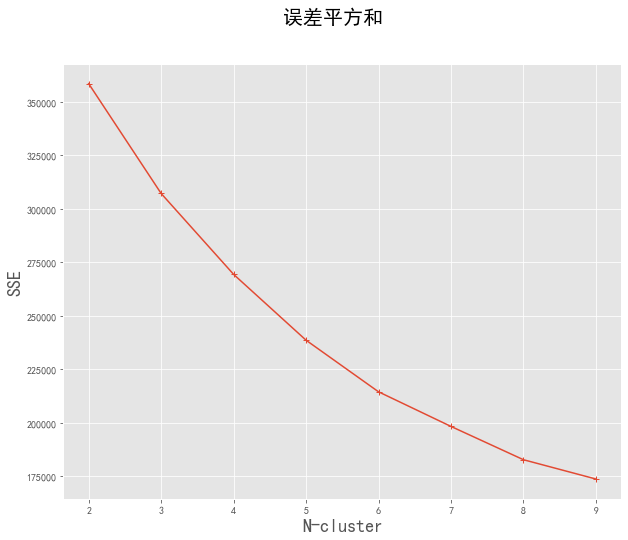

In [122]:
# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['font.size'] = 12.0
plt.rcParams['axes.unicode_minus'] = False
# 使用ggplot的绘图风格
plt.style.use('ggplot')
## 绘图观测SSE与簇个数的关系
fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(1,1,1)
ax.plot(nums,SSE,marker="+")
ax.set_xlabel("N-cluster", fontsize=18)
ax.set_ylabel("SSE", fontsize=18)
fig.suptitle("误差平方和", fontsize=20)
plt.show()


In [116]:
from sklearn import metrics
scores = []
for k in range(2,10):
    labels = KMeans(n_clusters=k,n_jobs=4).fit(df1_1).labels_
    score = metrics.silhouette_score(df1_1, labels)
    scores.append(score)
    print(score)

scores

0.3320346536594477
0.19938352751138688
0.18347792033689694
0.19526041883110645
0.2052198617395322
0.1957715226088203
0.2012585763558516
0.20458285106671809


[0.3320346536594477,
 0.19938352751138688,
 0.18347792033689694,
 0.19526041883110645,
 0.2052198617395322,
 0.1957715226088203,
 0.2012585763558516,
 0.20458285106671809]

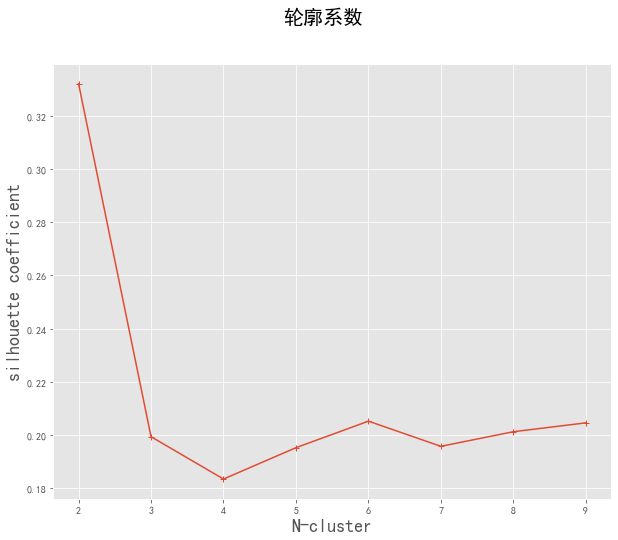

In [120]:
# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['font.size'] = 12.0
plt.rcParams['axes.unicode_minus'] = False
# 使用ggplot的绘图风格
plt.style.use('ggplot')
## 绘图观测SSE与簇个数的关系
fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(1,1,1)
ax.plot(nums,scores,marker="+")
ax.set_xlabel("N-cluster", fontsize=18)
ax.set_ylabel("silhouette coefficient", fontsize=18)
fig.suptitle("轮廓系数", fontsize=20)
plt.show()

array([0.96163904, 1.25231444, 1.25467552, ..., 0.19      , 0.14      ,
       0.225     ])

In [109]:
df1.columns

Index(['流失指标', '入会时间', '每公里票价', '季节性指标', '飞行次数', '总里程', '平均折扣率'], dtype='object')

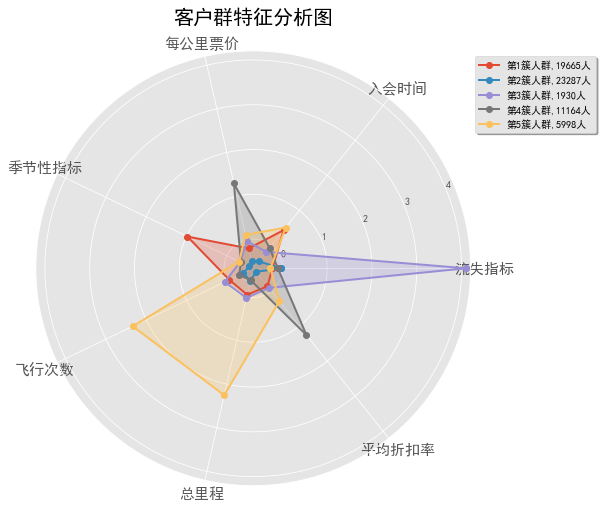

In [110]:
kmodel = KMeans(n_clusters=5, n_jobs=4)
kmodel.fit(df1_1)
# 简单打印结果
r1 = pd.Series(kmodel.labels_).value_counts() #统计各个类别的数目
r2 = pd.DataFrame(kmodel.cluster_centers_) #找出聚类中心
# 所有簇中心坐标值中最大值和最小值
max_bad = r2.values.max()
min = r2.values.min()
r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
r.columns = list(df1_1.columns) + [u'类别数目'] #重命名表头
 
# 绘图
fig=plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, polar=True)
center_num = r.values
feature = ['流失指标', '入会时间', '每公里票价', '季节性指标', '飞行次数', '总里程', '平均折扣率']
N =len(feature)
for i, v in enumerate(center_num):
    # 设置雷达图的角度，用于平分切开一个圆面
    angles=np.linspace(0, 2*np.pi, N, endpoint=False)
    # 为了使雷达图一圈封闭起来，需要下面的步骤
    center = np.concatenate((v[:-1],[v[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    # 绘制折线图
    ax.plot(angles, center, 'o-', linewidth=2, label = "第%d簇人群,%d人"% (i+1,v[-1]))
    # 填充颜色
    ax.fill(angles, center, alpha=0.25)
    # 添加每个特征的标签
    ax.set_thetagrids(angles * 180/np.pi, feature, fontsize=15)
    # 设置雷达图的范围
    ax.set_ylim(min-0.1, max_bad+0.1)
    # 添加标题
    plt.title('客户群特征分析图', fontsize=20)
    # 添加网格线
    ax.grid(True)
    # 设置图例
    plt.legend(loc='upper right', bbox_to_anchor=(1.3,1.0),ncol=1,fancybox=True,shadow=True)
    
# 显示图形
plt.show()

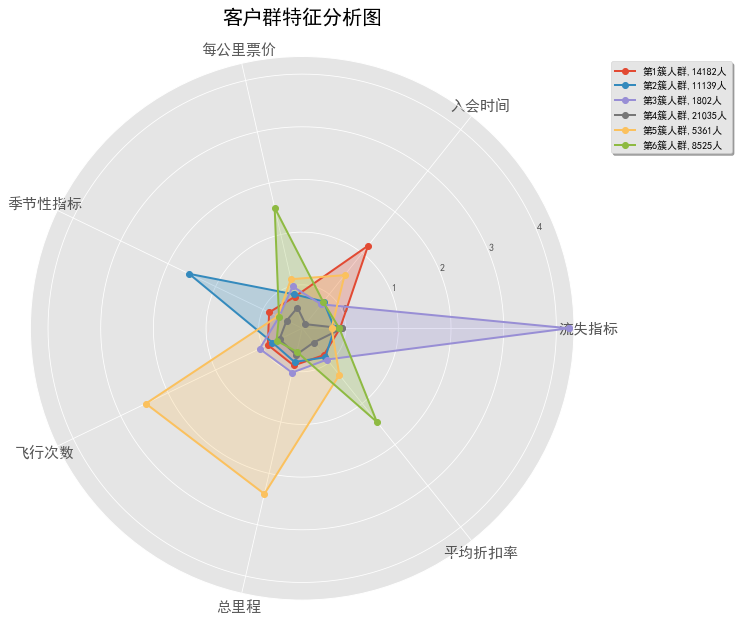

In [124]:
kmodel = KMeans(n_clusters=6, n_jobs=4)
kmodel.fit(df1_1)
# 简单打印结果
r1 = pd.Series(kmodel.labels_).value_counts() #统计各个类别的数目
r2 = pd.DataFrame(kmodel.cluster_centers_) #找出聚类中心
# 所有簇中心坐标值中最大值和最小值
max_bad = r2.values.max()
min = r2.values.min()
r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
r.columns = list(df1_1.columns) + [u'类别数目'] #重命名表头
 
# 绘图
fig=plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, polar=True)
center_num = r.values
feature = ['流失指标', '入会时间', '每公里票价', '季节性指标', '飞行次数', '总里程', '平均折扣率']
N =len(feature)
for i, v in enumerate(center_num):
    # 设置雷达图的角度，用于平分切开一个圆面
    angles=np.linspace(0, 2*np.pi, N, endpoint=False)
    # 为了使雷达图一圈封闭起来，需要下面的步骤
    center = np.concatenate((v[:-1],[v[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    # 绘制折线图
    ax.plot(angles, center, 'o-', linewidth=2, label = "第%d簇人群,%d人"% (i+1,v[-1]))
    # 填充颜色
    ax.fill(angles, center, alpha=0.25)
    # 添加每个特征的标签
    ax.set_thetagrids(angles * 180/np.pi, feature, fontsize=15)
    # 设置雷达图的范围
    ax.set_ylim(min-0.1, max_bad+0.1)
    # 添加标题
    plt.title('客户群特征分析图', fontsize=20)
    # 添加网格线
    ax.grid(True)
    # 设置图例
    plt.legend(loc='upper right', bbox_to_anchor=(1.3,1.0),ncol=1,fancybox=True,shadow=True)
    
# 显示图形
plt.show()

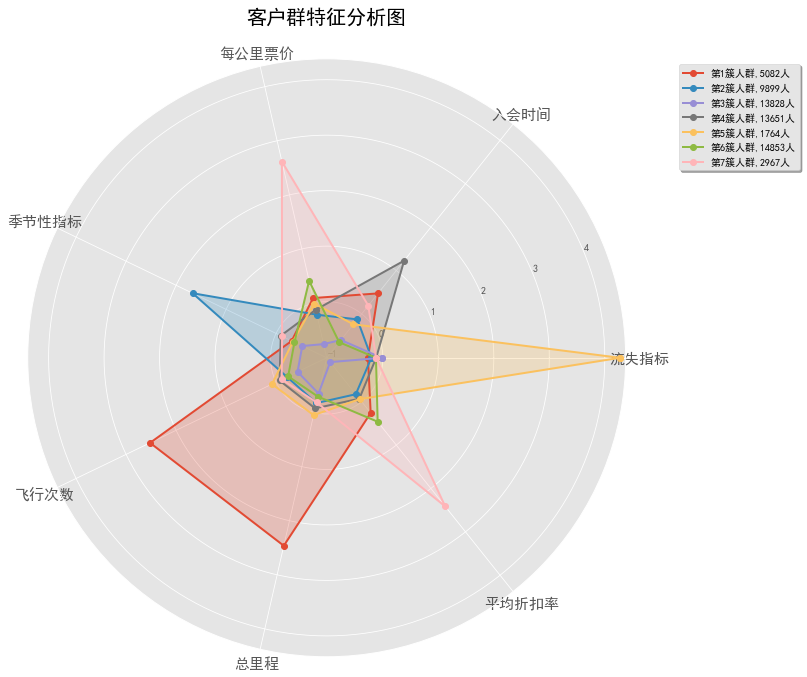

In [119]:
kmodel = KMeans(n_clusters=7, n_jobs=4)
kmodel.fit(df1_1)
# 简单打印结果
r1 = pd.Series(kmodel.labels_).value_counts() #统计各个类别的数目
r2 = pd.DataFrame(kmodel.cluster_centers_) #找出聚类中心
# 所有簇中心坐标值中最大值和最小值
max_bad = r2.values.max()
min = r2.values.min()
r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
r.columns = list(df1_1.columns) + [u'类别数目'] #重命名表头
 
# 绘图
fig=plt.figure(figsize=(15, 11))
ax = fig.add_subplot(111, polar=True)
center_num = r.values
feature = ['流失指标', '入会时间', '每公里票价', '季节性指标', '飞行次数', '总里程', '平均折扣率']
N =len(feature)
for i, v in enumerate(center_num):
    # 设置雷达图的角度，用于平分切开一个圆面
    angles=np.linspace(0, 2*np.pi, N, endpoint=False)
    # 为了使雷达图一圈封闭起来，需要下面的步骤
    center = np.concatenate((v[:-1],[v[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    # 绘制折线图
    ax.plot(angles, center, 'o-', linewidth=2, label = "第%d簇人群,%d人"% (i+1,v[-1]))
    # 填充颜色
    ax.fill(angles, center, alpha=0.25)
    # 添加每个特征的标签
    ax.set_thetagrids(angles * 180/np.pi, feature, fontsize=15)
    # 设置雷达图的范围
    ax.set_ylim(min-0.1, max_bad+0.1)
    # 添加标题
    plt.title('客户群特征分析图', fontsize=20)
    # 添加网格线
    ax.grid(True)
    # 设置图例
    plt.legend(loc='upper right', bbox_to_anchor=(1.3,1.0),ncol=1,fancybox=True,shadow=True)
    
# 显示图形
plt.show()